# Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. They have decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 

Essentially, the company wants —

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

## Content

1. [Reading and understanding the data](#ReadAndUnderstand)
2. [Visualize the data](#Visualize)
3. [Data Preparation](#DataPrep)
4. [Splitting the Data into Training and Testing Sets](#Split)
5. [Building a linear model](#Build)
6. [Residual Analysis of the train data](#Residual)
7. [Making Predictions Using the Final Model](#Predict)
8. [Model Evaluation](#Evaluation)

## 1. Reading and Understanding the data<a class="anchor" id="ReadAndUnderstand"></a>

In [2]:
BikeRental = pd.read_csv('day.csv')

In [3]:
BikeRental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
BikeRental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
BikeRental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Replacing the values for categorical variables

In [6]:
# Replacing season with actual values since it is categorical with more that two levels

BikeRental['season'] = BikeRental[['season']].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}),axis=1)
BikeRental.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [7]:
# Replacing month with actual values since it is categorical with more that two levels

BikeRental['mnth'] = BikeRental[['mnth']].apply(lambda x: x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}),axis=1)
BikeRental.mnth.value_counts()

jan     62
mar     62
may     62
july    62
aug     62
oct     62
dec     62
apr     60
june    60
sep     60
nov     60
feb     56
Name: mnth, dtype: int64

In [8]:
# Replacing weekday with actual values since it is categorical with more that two levels

BikeRental['weekday'] = BikeRental[['weekday']].apply(lambda x: x.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}),axis=1)
BikeRental.weekday.value_counts()

sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: weekday, dtype: int64

In [9]:
# Replacing weathersit with actual values since it is categorical with more that two levels

BikeRental['weathersit'] = BikeRental[['weathersit']].apply(lambda x: x.map({1:'Clear',2:'Misty',3:'Light Rain/Snow',4:'Heavy Rain'}),axis=1)
BikeRental.weathersit.value_counts()

Clear              463
Misty              246
Light Rain/Snow     21
Name: weathersit, dtype: int64

In [10]:
# Creating a new field called week of the month 'wom' this could help in understanding the trends in specific weeks

BikeRental['dteday'] = pd.to_datetime(BikeRental['dteday'])
BikeRental['wom'] = BikeRental['dteday'].apply(lambda x: (x.day-1) // 7 + 1)
BikeRental['wom'] = BikeRental[['wom']].apply(lambda x: x.map({1:'1st week',2:'2nd week',3:'3rd week',4:'4rth week',5:'5th week'}),axis=1)
BikeRental.wom.value_counts()

1st week     168
2nd week     168
3rd week     168
4rth week    168
5th week      58
Name: wom, dtype: int64

### Droping columns which are not required

In [11]:
#'instant' can be droped as this indicates the record index which will not add any value
BikeRental.drop('instant',axis=1,inplace=True)

In [12]:
#'dteday is not required as the information from date is present as week of the month, month, year, weekday'

BikeRental.drop('dteday',axis=1,inplace=True)

In [13]:
BikeRental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
 14  wom         730 non-null    object 
dtypes: float64(4), int64(6), object(5)
memory usage: 85.7+ KB


## 2. Visualize the data<a class="anchor" id="Visualize"></a>

#### Visualizing Numeric Variables
- For visualizing the numeric variables we will create pairplots

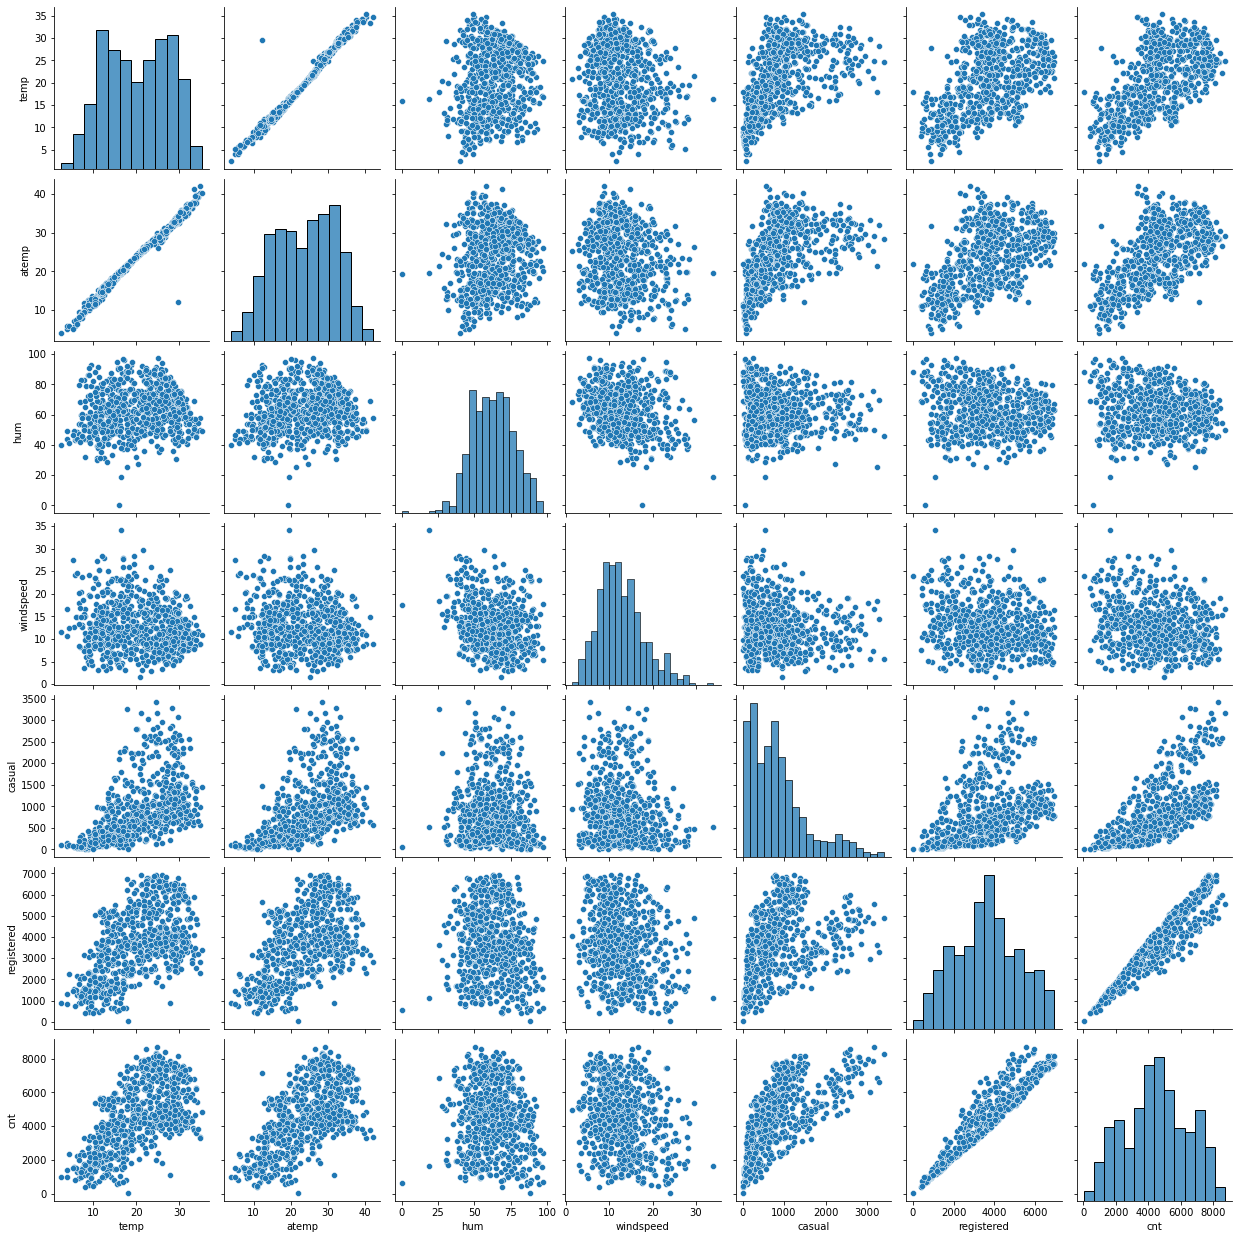

In [14]:
# For visualizing numeric variables
# Following are the numerical fields considered: 
#'temp','atemp','hum','windspeed','casual','registered','cnt'

sns.pairplot(data = BikeRental, vars=['temp','atemp','hum','windspeed','casual','registered','cnt'])
plt.show()

### Observations:
- temp and atemp has high correlation b/w them which makes sense as temperature(temp) increases the feeling temperature(atemp) will also increases
- temp,atemp and cnt have somewhat linear relationship
- casual and registered have a linear relationship with cnt since cnt is sum of registered and casual
- looking at the plots b/w casual and registered we could see that in genearal registered users contribute more to the total count than the casual users.
- in case of humidity(hum) the no of users(cnt) forms a cluster when humidity is b/w 25-10
- in case of windspeed the no of users(cnt) forms a cluster when windspeed in b/w 0-20

In [15]:
# Drop casual and registered feature as the sum of this is represented by cnt and since cnt is the target variable
# this will not have any impact on the model
BikeRental.drop(['casual','registered'],axis=1,inplace=True)

#### Visualizing Categorical Variables
- For visualizing the categorical variables we will be using box plots

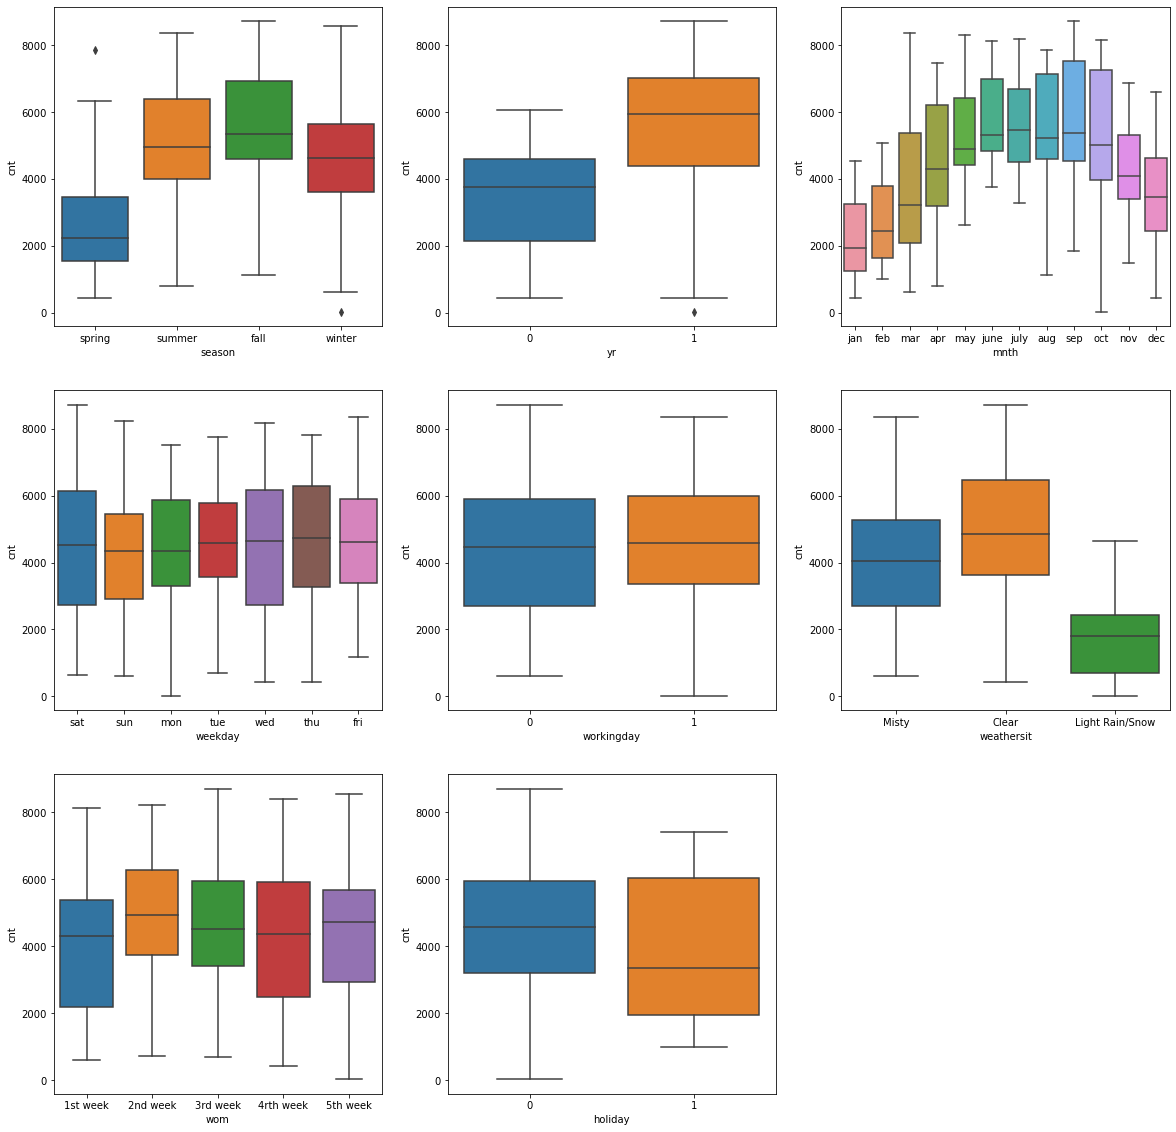

In [16]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BikeRental)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = BikeRental)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = BikeRental)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = BikeRental)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = BikeRental)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BikeRental)
plt.subplot(3,3,7)
sns.boxplot(x = 'wom', y = 'cnt', data = BikeRental)
plt.subplot(3,3,8)
sns.boxplot(x = 'holiday', y = 'cnt', data = BikeRental)
plt.show()

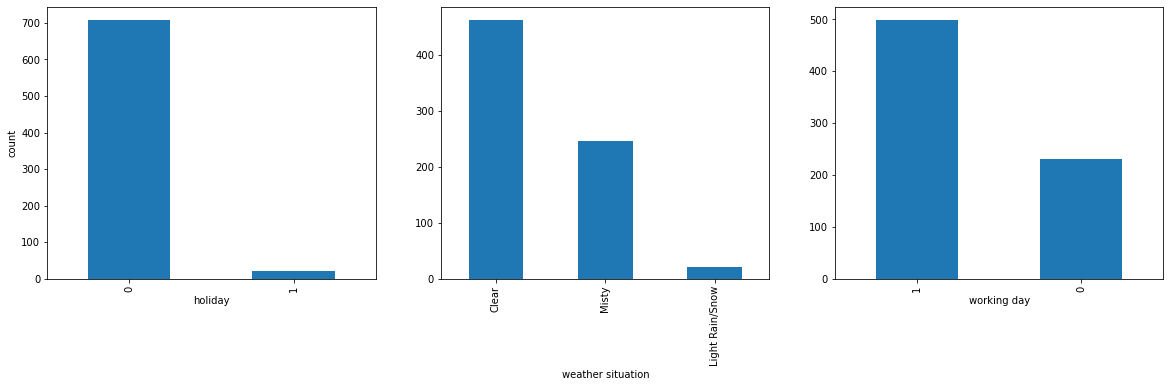

In [17]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
BikeRental.holiday.value_counts().plot.bar()
plt.xlabel('holiday')
plt.ylabel('count')
plt.subplot(1,3,2)
BikeRental.weathersit.value_counts().plot.bar()
plt.xlabel('weather situation')
plt.subplot(1,3,3)
BikeRental.workingday.value_counts().plot.bar()
plt.xlabel('working day')
plt.show()

### Observations
- Season: No of users are more during summer and fall, with spring being the least
- Year(yr): Here we can see that in the year 2019(1) the no of users are considerably more compared to 2018(0) which is a indicator of significant increase in YoY users.
- Month(mnth): We can see that the more no of users are in the mid year b/w april and november and overall jan and feb has the least
- Weather Situation: More users are when the weather is clear, then comes misty and then Light rain/snow,For Heavy rain/snow we don't see any data which could mean that no one will be using bike in such weather condition.
- More no of users are when there is no holiday, clear weather situation and working day

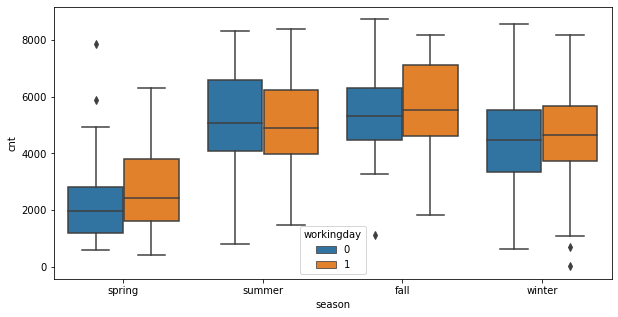

In [18]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = BikeRental)
plt.show()

#Observation:
# During spring we could see increase in users during working day

## 3. Data Preparation<a class="anchor" id="DataPrep"></a>

In [19]:
BikeRental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,wom
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1st week
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1st week
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1st week
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1st week
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1st week


- For columns yr, holiday, workingday the values 1s and 0s are already filled hence we **don't have to perform any binary mapping**
- For columns season, mnth, weekday, weathersit, wom **dummy variables have to be created**

In [20]:
# Creating dummy variables
Season_Df = pd.get_dummies(BikeRental['season'], drop_first = True)
Month_Df = pd.get_dummies(BikeRental['mnth'], drop_first = True)
Weekday_Df = pd.get_dummies(BikeRental['weekday'], drop_first = True)
Weathersit_Df = pd.get_dummies(BikeRental['weathersit'],drop_first=True)
Wom_Df = pd.get_dummies(BikeRental['wom'],drop_first=True)

In [21]:
BikeRental = pd.concat([BikeRental,Season_Df,Month_Df,Weekday_Df,Weathersit_Df,Wom_Df],axis = 1)

In [22]:
# Dropping the columns for which dummy variables are created
varlist = ['season','mnth','weekday','weathersit','wom']
BikeRental.drop(varlist,axis=1,inplace=True)

In [23]:
BikeRental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   spring           730 non-null    uint8  
 9   summer           730 non-null    uint8  
 10  winter           730 non-null    uint8  
 11  aug              730 non-null    uint8  
 12  dec              730 non-null    uint8  
 13  feb              730 non-null    uint8  
 14  jan              730 non-null    uint8  
 15  july             730 non-null    uint8  
 16  june             730 non-null    uint8  
 17  mar             

## 4. Splitting the Data into Training and Testing Sets<a class="anchor" id="Split"></a>

In [24]:
#Using train_test_split from sklearn we split the data into train and test set in 7:3 ratio

np.random.seed(0)
df_train, df_test = train_test_split(BikeRental, train_size = 0.7, random_state = 100)

In [25]:
print('Total shape:',BikeRental.shape)
print('Train set shape:',df_train.shape)
print('Test set shape:',df_test.shape)

Total shape: (730, 34)
Train set shape: (510, 34)
Test set shape: (220, 34)


### Rescaling the Features 

The values of features `temp,atemp,hum,windspeed,cnt` needs to be scales since these has high values compared to other columns which are mostly 0s or 1s. Here we are going to use Min-Max scaling on these features.

In [26]:
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [27]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,sun,thu,tue,wed,Light Rain/Snow,Misty,2nd week,3rd week,4rth week,5th week
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,1,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,1,0,0,1,0


In [28]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,sun,thu,tue,wed,Light Rain/Snow,Misty,2nd week,3rd week,4rth week,5th week
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.223529,0.235294,0.221569,0.082353
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.417019,0.424599,0.415710,0.275172
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


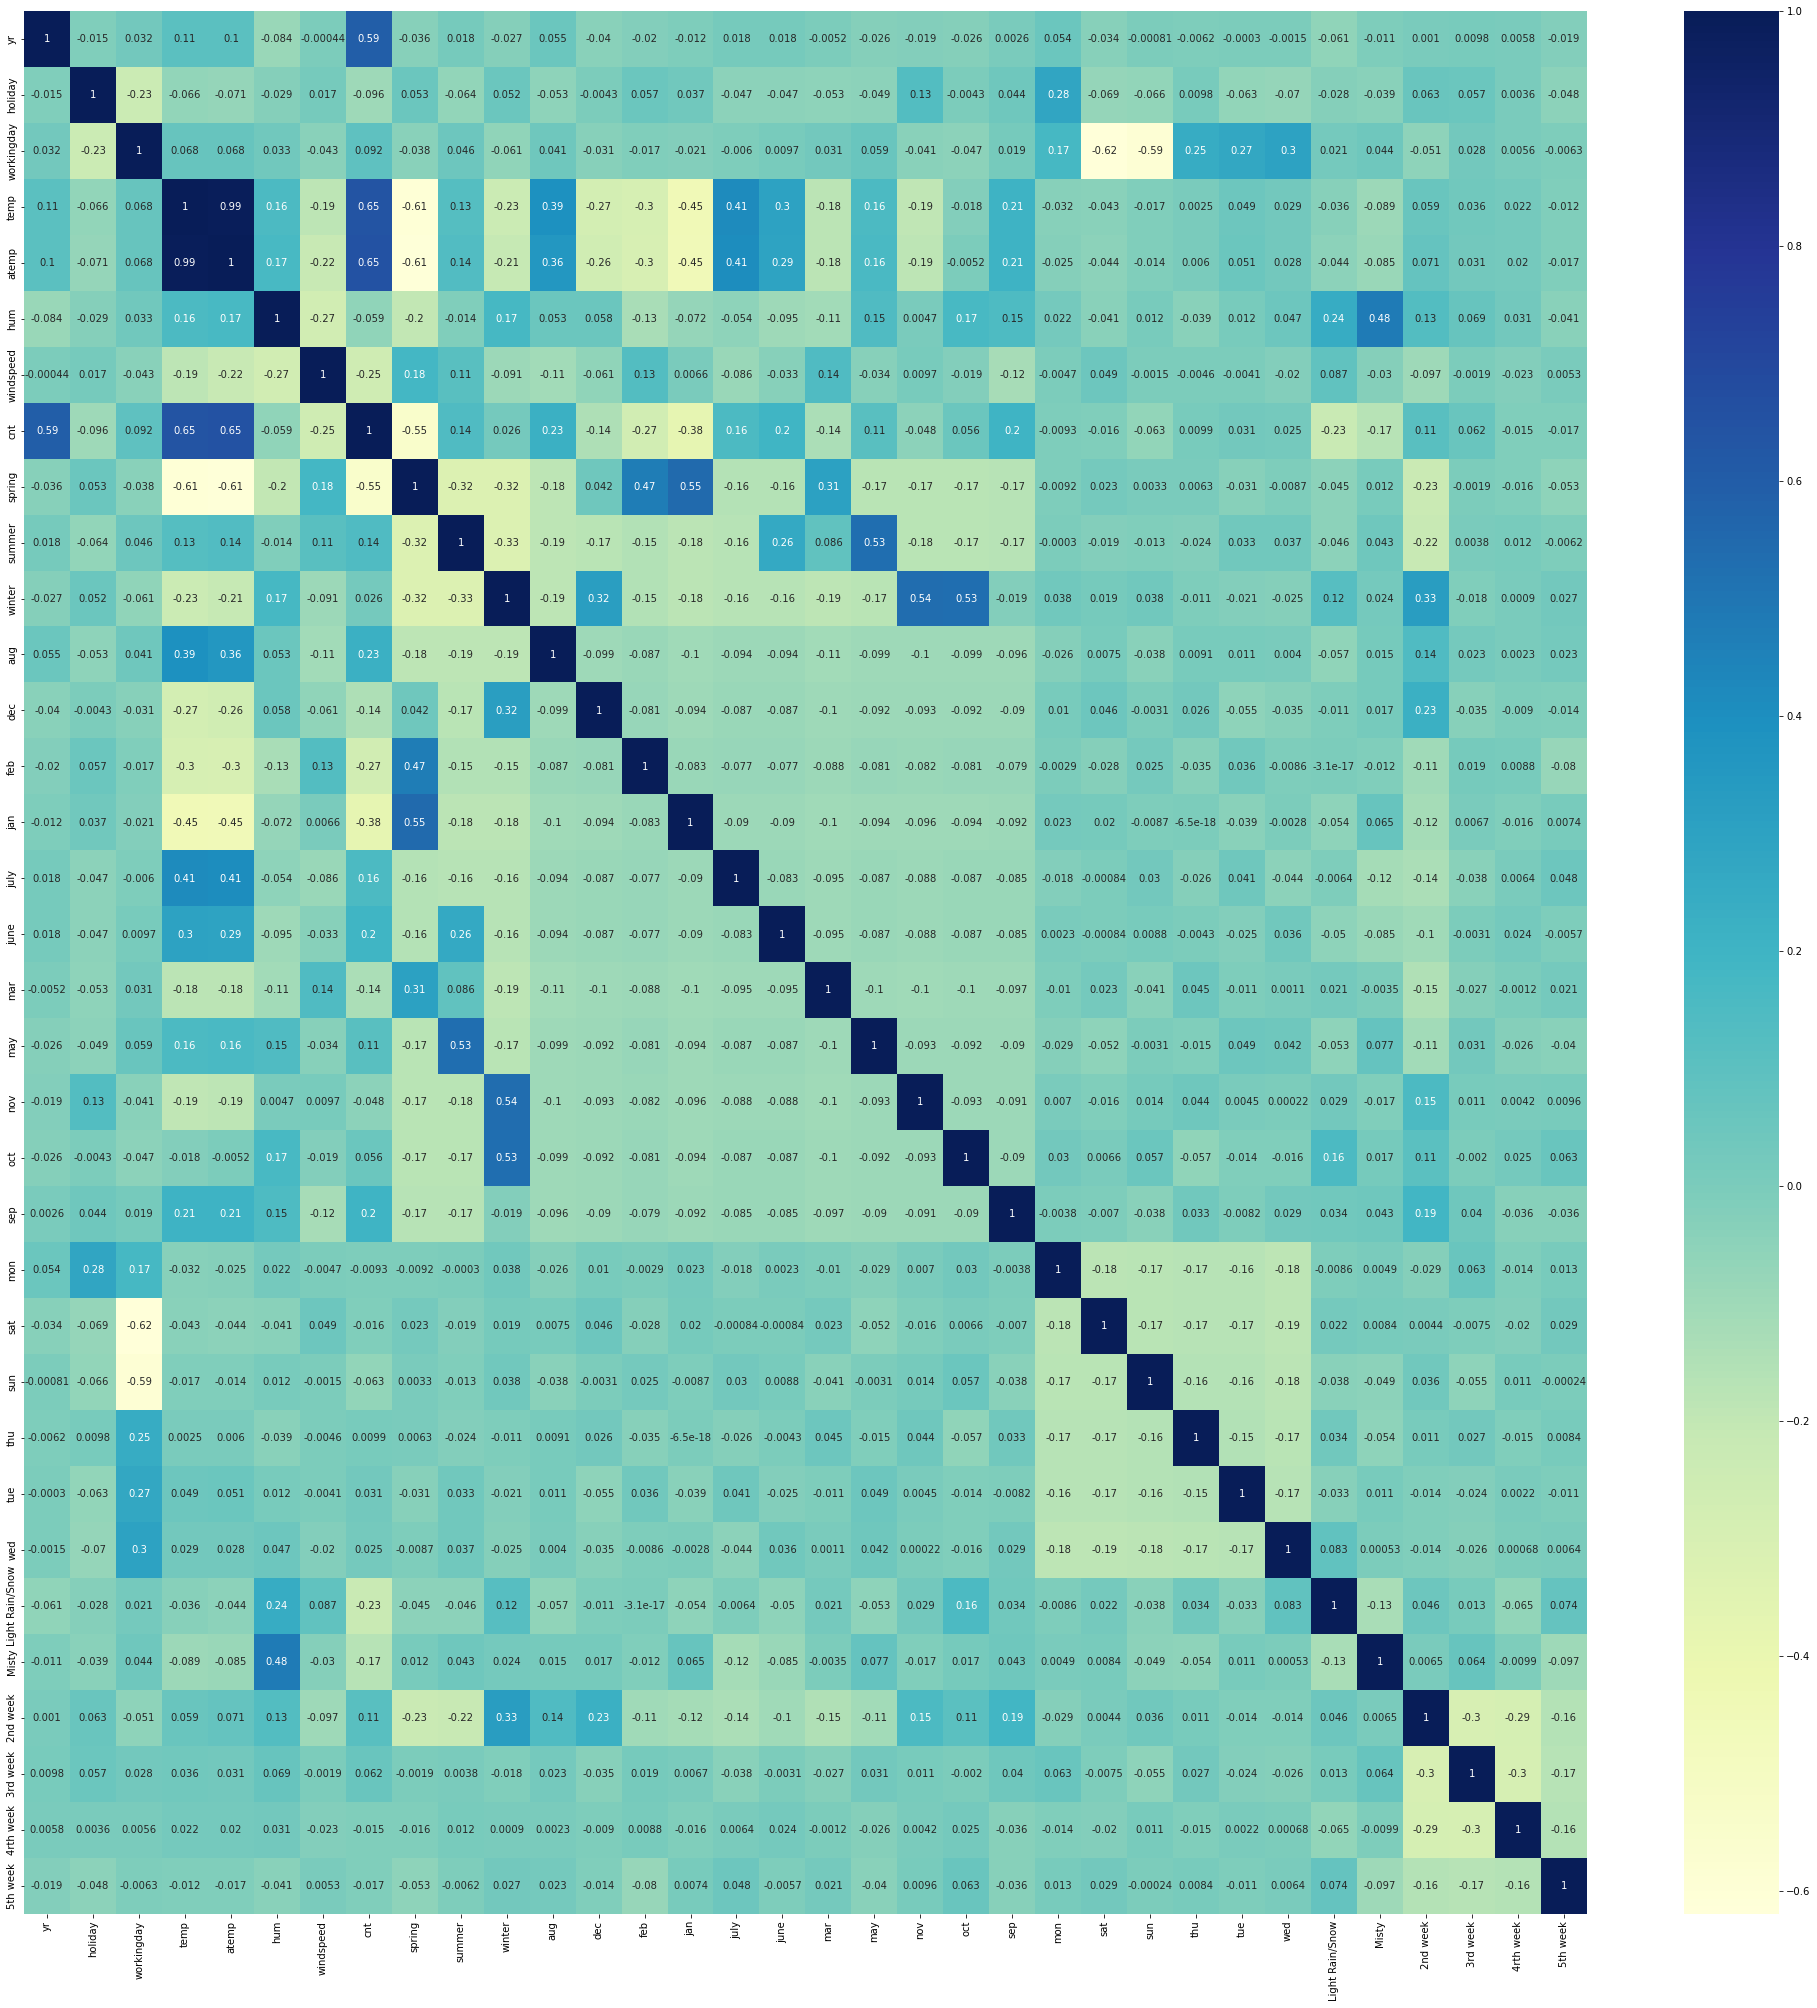

In [29]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (35, 35))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- cnt has good +ve correlation with `temp,atemp,yr`
- cnt has considerably good -ve `correlation with windspeed,spring,light rain`

## 5. Building a linear model<a class="anchor" id="Build"></a>

### Dividing into X and Y sets for the model building

In [30]:
y_train = df_train.pop('cnt')
X_train = df_train

#### Using RFE to eliminate features

Since we have a total of 34 features,manually elimating the insignificant features is difficult hence we use RFE to list down the top 15 features automatically.

In [31]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 9),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 19),
 ('mar', False, 12),
 ('may', False, 8),
 ('nov', False, 3),
 ('oct', False, 17),
 ('sep', True, 1),
 ('mon', False, 13),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 15),
 ('tue', False, 16),
 ('wed', False, 18),
 ('Light Rain/Snow', True, 1),
 ('Misty', True, 1),
 ('2nd week', False, 14),
 ('3rd week', False, 6),
 ('4rth week', False, 10),
 ('5th week', False, 11)]

In [33]:
# Significant features based on RFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'july', 'sep', 'sat', 'sun', 'Light Rain/Snow',
       'Misty'],
      dtype='object')

In [34]:
# Insignificant features based on RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed', '2nd week', '3rd week', '4rth week',
       '5th week'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [35]:
# creating a new X train with rfe filtered features

X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [36]:
# Adding constant

X_train_rfe = sm.add_constant(X_train_rfe)

In [37]:
# Running the linear model

lm = sm.OLS(y_train,X_train_rfe).fit()   
# summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          2.11e-191
Time:                        21:16:02   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1995      0.028     

In [38]:
# Holiday can be dropped since it has high p-value, also since workingday indirectly represents holidays as well
# we can drop it.

X_train_rfe.drop(['holiday'],axis=1,inplace=True)

In [39]:
# Create the model again

lm = sm.OLS(y_train,X_train_rfe).fit()   
# summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          2.11e-191
Time:                        21:16:02   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1811      0.042     

#### To determine the colinearity we will now calculate the VIF

In [40]:
# Calculate the VIFs 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,114.08
2,workingday,9.07
11,sat,6.06
12,sun,5.74
6,spring,5.02
3,temp,3.62
8,winter,3.49
7,summer,2.62
4,hum,1.91
14,Misty,1.57


A VIF greater than 5 doesn't seem to add any value to the model hence can be dropped one by one

In [41]:
# By looking at the model summary and VIF values feature 'sun' can be removed as it has high VIF value and high p-value
X_train_rfe.drop(['sun'],axis=1,inplace=True)

In [42]:
# Create the model again

lm = sm.OLS(y_train,X_train_rfe).fit()   
# summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          1.54e-191
Time:                        21:16:02   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2307      0.036     

In [43]:
# Calculate the VIFs 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,81.14
6,spring,5.02
3,temp,3.62
8,winter,3.48
7,summer,2.62
4,hum,1.91
2,workingday,1.65
11,sat,1.64
13,Misty,1.57
9,july,1.49


In [44]:
# Now the p-value for all of them seems good. From the VIF values spring is still slightly greater than 5 will drop
# this and see how the model is
# X_train_rfe.drop(['spring'],axis=1,inplace=True)

In [45]:
# Create the model again

#lm = sm.OLS(y_train,X_train_rfe).fit()   
# summary
#print(lm.summary())

In [46]:
# Calculate the VIFs 
#vif = pd.DataFrame()
#X = X_train_rfe
#vif['Features'] = X.columns
#vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
#vif = vif.sort_values(by = "VIF", ascending = False)
#vif

#### Even though spring has high VIF, we have decided to drop july as it has some p-value and when july is dropped and spring is kept the R-square and the adjusted R-squared in training set doesn't change much but in the test set the R-squared value have improved.

In [47]:
# Removing July as it has some p-value

X_train_rfe.drop(['july'],axis=1,inplace=True)
# Create the model again

lm = sm.OLS(y_train,X_train_rfe).fit()   
# summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.1
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          7.35e-191
Time:                        21:16:02   Log-Likelihood:                 510.73
No. Observations:                 510   AIC:                            -995.5
Df Residuals:                     497   BIC:                            -940.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2176      0.036     

In [48]:
# Calculate the VIFs 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,79.88
6,spring,4.83
3,temp,3.53
8,winter,3.27
7,summer,2.29
4,hum,1.90
2,workingday,1.65
10,sat,1.64
12,Misty,1.57
11,Light Rain/Snow,1.25


After removing July the R^2 and adjusted R^2 value didn't change much

## 6. Residual Analysis of the train data<a class="anchor" id="Residual"></a>

**1. So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.**

In [49]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

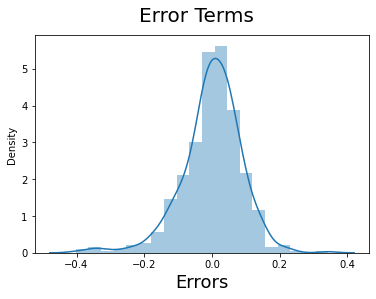

In [50]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

It is a normal distribution with mean = 0

**2. Error term/ residual should be independent**

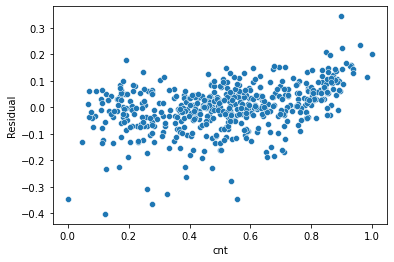

In [51]:
res = y_train - y_train_pred
sns.scatterplot(y_train,res)
plt.ylabel('Residual')
plt.show()

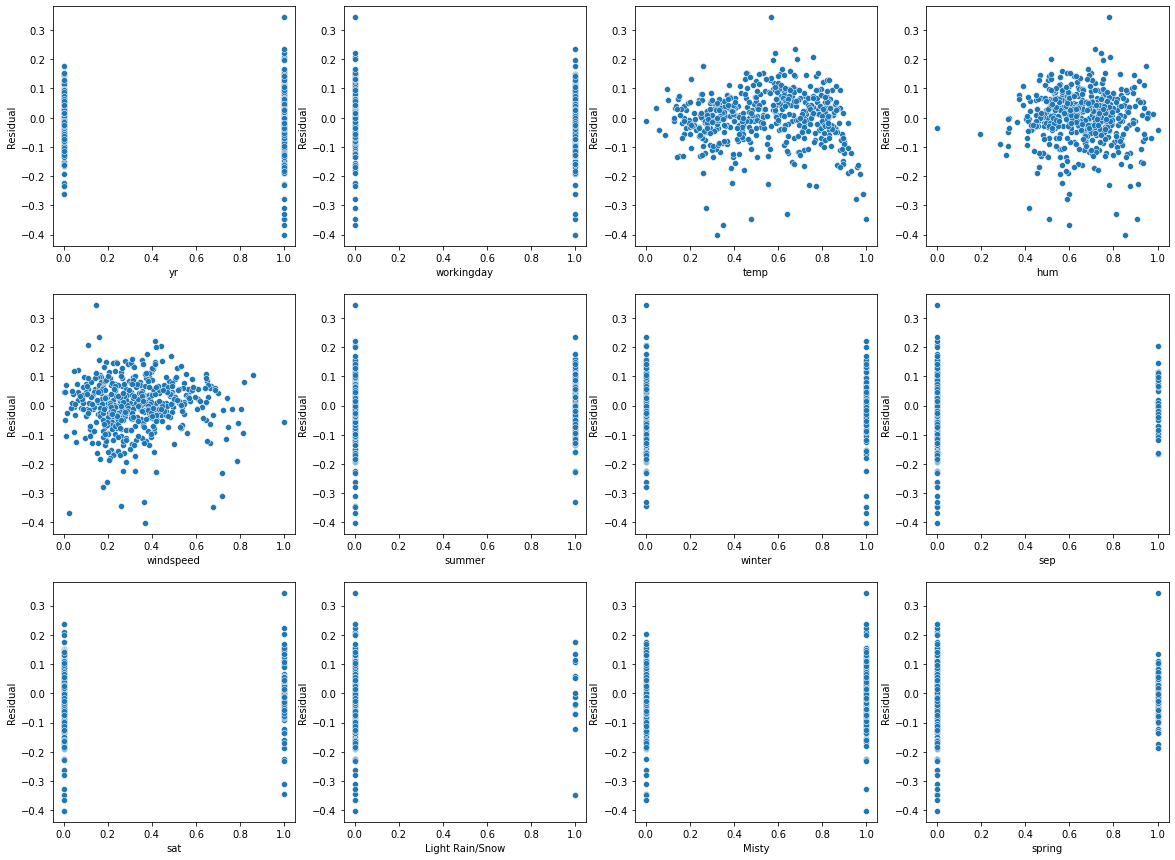

In [52]:
res = y_train - y_train_pred
features = ['yr','workingday','temp','hum','windspeed','summer','winter','sep','sat','Light Rain/Snow','Misty','spring']
plt.figure(figsize=(20, 15))
for i,j in enumerate(features):
    plt.subplot(3,4,i+1)
    plt.ylabel('Residual')
    sns.scatterplot(X_train_rfe[j],res)
plt.show()

#### There is no visible pattern in the error terms and is distributed evenly across zero

## 7. Making Predictions Using the Final Model<a class="anchor" id="Predict"></a>

In [53]:
#Applying the scaling on the test sets
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [54]:
# Spliting into X and y

y_test = df_test.pop('cnt')
X_test = df_test

In [55]:
X_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,sun,thu,tue,wed,Light Rain/Snow,Misty,2nd week,3rd week,4rth week,5th week
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.254545,0.263636,0.236364,...,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.245455,0.218182,0.250,0.072727
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.436599,0.441609,0.425817,...,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.431338,0.413953,0.434,0.260281
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.250,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000


In [56]:
y_test.describe()

count    220.000000
mean       0.522154
std        0.219163
min        0.048205
25%        0.378595
50%        0.524678
75%        0.677750
max        0.963300
Name: cnt, dtype: float64

In [57]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            510 non-null    float64
 1   yr               510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   hum              510 non-null    float64
 5   windspeed        510 non-null    float64
 6   spring           510 non-null    uint8  
 7   summer           510 non-null    uint8  
 8   winter           510 non-null    uint8  
 9   sep              510 non-null    uint8  
 10  sat              510 non-null    uint8  
 11  Light Rain/Snow  510 non-null    uint8  
 12  Misty            510 non-null    uint8  
dtypes: float64(4), int64(2), uint8(7)
memory usage: 31.4 KB


In [58]:
col_dropped_by_rfe = X_train.columns[~rfe.support_]
col_dropped_manually = ['holiday','sun','july']

In [59]:
# Drop all these columns from test set
X_test.drop(col_dropped_by_rfe,axis=1,inplace=True)
X_test.drop(col_dropped_manually,axis=1,inplace=True)

In [60]:
# Add Constant
X_test = sm.add_constant(X_test)

In [61]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            220 non-null    float64
 1   yr               220 non-null    int64  
 2   workingday       220 non-null    int64  
 3   temp             220 non-null    float64
 4   hum              220 non-null    float64
 5   windspeed        220 non-null    float64
 6   spring           220 non-null    uint8  
 7   summer           220 non-null    uint8  
 8   winter           220 non-null    uint8  
 9   sep              220 non-null    uint8  
 10  sat              220 non-null    uint8  
 11  Light Rain/Snow  220 non-null    uint8  
 12  Misty            220 non-null    uint8  
dtypes: float64(4), int64(2), uint8(7)
memory usage: 13.5 KB


In [62]:
y_test_pred = lm.predict(X_test)

## 8. Model Evaluation<a class="anchor" id="Evaluation"></a>

Text(0, 0.5, 'y_test_pred')

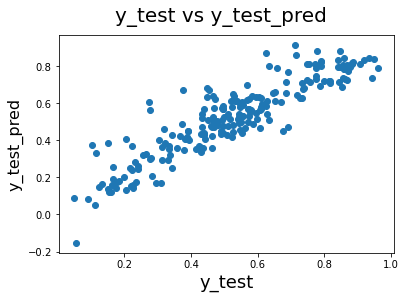

In [63]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

In [64]:
#R-Squared value

r2_score(y_test, y_test_pred)

0.8148718910827932

In [71]:
#Adjusted R-Squared Value

# Adjusted R2 = 1 - (1-R^2)(N-1)/(N-P-1)
# N = len(y_test) or len(y_test_pred), P = 13 (no of features including const)

1-(1-(r2_score(y_test, y_test_pred)))*(len(y_test)-1)/(len(y_test)-13-1)

0.803189049257921

### R^2 Value Comparison
- Train Data =>  0.843
- Test Data => 0.815

### Adjusted R^2 Value Comparison
- Train Data =>  0.839
- Test Data => 0.803

In [69]:
# Coefficients
lm.params

const              0.217590
yr                 0.230706
workingday         0.052970
temp               0.512612
hum               -0.152440
windspeed         -0.180148
spring            -0.044946
summer             0.069743
winter             0.110757
sep                0.094179
sat                0.062473
Light Rain/Snow   -0.247184
Misty             -0.055817
dtype: float64

cnt = 0.2176 + 0.2307 * `yr` + 0.053 * `workingday` + 0.5126 * `temp` - 0.1524 * `hum` - 0.1801 * `windspeed` - 0.045 * `spring` + 0.0697 * `summer` + 0.1108 * `winter` + 0.0942 * `sep` + 0.0625 * `sat` - 0.2472 * `Light Rain/Snow` - 0.056 * `Misty`

### The toal number of users (cnt) is dependent on:
- year(yr) **+ve**
- workingday **+ve**
- temperature(temp) **+ve**
- humidity(hum) **-ve**
- windspeed **-ve**
- season (summer, winter) **+ve**
- season (spring) **-ve**
- month (september(sep))  **+ve**
- weekday (saturday(sat)) **+ve**
- weather situation (Light Rain/Snow, Misty) **-ve**